# Proyecto Final ML23

In [61]:
import gymnasium as gym
import matplotlib.pyplot as plt
import pathlib
import datetime as dt
import numpy as np
import random
import time
import os



# **Parametros**

* `interacion:`       **int**   #Episodios
* `learning_rate:`    **float** #Learning rate
* `gamma:`            **float** #Discount rate
* `epsilon:`          **float** # Exploration probability
* `seed:`             **int**   # Define a seed so that we get reproducible results
* `n_runs:`           **int**   # Number of runs
* `action_size:`      **int**   # Number of possible actions
* `state_size:`       **int**   # Number of possible states
* `proba_frozen:`     **float** # Probability that a tile is frozen
 


In [62]:
#El hugo y sus parametros ://////
iteracion = 10 #episodios
learning_rate = 0.3
intentos = 5 #numero de intentos
discount_rate = 0.4 #gamma
exploration_chance = 0.8 #epsilon
semilla = 56738
mininum_chance = 0.03
decreasing_decay = 0.01
rewards_per_iteracion = list()
env = gym.make('FrozenLake-v1', desc=None, render_mode="human" ,map_name="4x4", is_slippery=False) #ambiente

In [63]:
#Qtable Printout
qtable = np.zeros((16,4))
print(qtable)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [66]:
file_path = "frozenlake_QL.ipynb"
today = dt.datetime.now()
def plot_episode_rewards(rewards):
    plt.plot(rewards)
    plt.title('Episode Rewards Over Time')
    plt.xlabel('Episode')
    plt.ylabel('Cumulative Reward')
    losses_file =file_path/f'reward figures/Recompensa_(today).png'
    plt.savefig(losses_file)
    
    plt.show()

In [67]:
from gym.envs.toy_text.frozen_lake import generate_random_map #Utilizar esto para generar mapas y evaluar al agente entrenado
#metodo para entrenar al agente 
def training_waf(iteracion, intentos, exploration_chance, qtable, learning_rate, discount_rate, mininum_chance, decreasing_decay, rewards_per_iteracion):
    #Entrenamiento del agente imbezil
    #we iterate over episodes
    e=0
    total_episode_reward = 0
    
    for e in range(iteracion):
        #we initialize the first state of the episode
        
        current_state = env.reset()[0] #GRAAAAAAAAAAAAAAH X_x
        done = False
    
        #sum the rewards that the agent gets from the environment
        total_episode_reward = 0
    
        for i in range(intentos): 
            
            # we sample a float from a uniform distribution over 0 and 1
            # if the sampled flaot is less than the exploration proba
            #     the agent selects arandom action
            # else
            #     he exploits his knowledge using the bellman equation 
        
            if np.random.uniform(0,1) < exploration_chance:
                action = env.action_space.sample()
            else:
                action = np.argmax(qtable[current_state,:])
        
            # The environment runs the chosen action and returns
            # the next state, a reward and true if the epiosed is ended.
            info = env.step(action)
            next_state, reward, done, _, _ = info
        
            # We update our Q-table using the Q-learning iteration
            qtable[int(current_state), action] = (1-learning_rate) * qtable[int(current_state), action] +learning_rate*(reward + discount_rate*np.max(qtable[int(next_state),:]))
            total_episode_reward = total_episode_reward + reward
            # If the episode is finished, we leave the for loop
            if done:
                break
            print(f"iteracion: {e+1}")
            print(info)
            current_state = next_state
       
        print(info)
        env.render()
        
    
        #We update the exploration proba using exponential decay formula 
        exploration_chance = max(mininum_chance, np.exp(-decreasing_decay*e))
        rewards_per_iteracion.append(total_episode_reward)   
    env.close()
    


iteracion: 1
(0, 0.0, False, False, {'prob': 1.0})
iteracion: 1
(4, 0.0, False, False, {'prob': 1.0})
iteracion: 1
(8, 0.0, False, False, {'prob': 1.0})
iteracion: 1
(8, 0.0, False, False, {'prob': 1.0})
iteracion: 1
(8, 0.0, False, False, {'prob': 1.0})
(8, 0.0, False, False, {'prob': 1.0})
iteracion: 2
(0, 0.0, False, False, {'prob': 1.0})
iteracion: 2
(4, 0.0, False, False, {'prob': 1.0})
iteracion: 2
(0, 0.0, False, False, {'prob': 1.0})
iteracion: 2
(0, 0.0, False, False, {'prob': 1.0})
iteracion: 2
(1, 0.0, False, False, {'prob': 1.0})
(1, 0.0, False, False, {'prob': 1.0})
iteracion: 3
(1, 0.0, False, False, {'prob': 1.0})
iteracion: 3
(0, 0.0, False, False, {'prob': 1.0})
iteracion: 3
(0, 0.0, False, False, {'prob': 1.0})
iteracion: 3
(0, 0.0, False, False, {'prob': 1.0})
iteracion: 3
(4, 0.0, False, False, {'prob': 1.0})
(4, 0.0, False, False, {'prob': 1.0})
iteracion: 4
(0, 0.0, False, False, {'prob': 1.0})
iteracion: 4
(0, 0.0, False, False, {'prob': 1.0})
iteracion: 4
(0, 0.

TypeError: unsupported operand type(s) for /: 'str' and 'str'

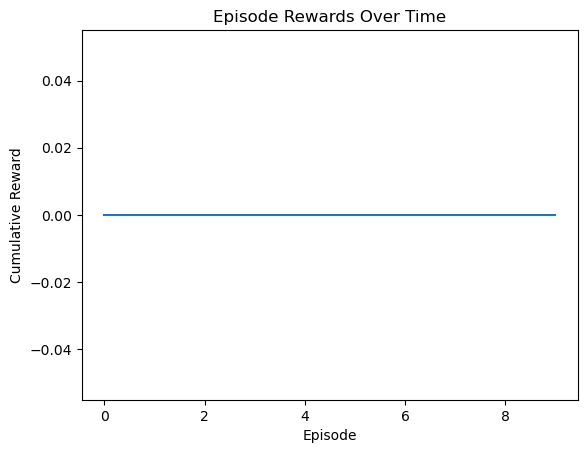

In [68]:
training_waf(iteracion, intentos, exploration_chance, qtable, learning_rate, discount_rate, mininum_chance, decreasing_decay, rewards_per_iteracion)
#plot_episode_rewards(rewards_per_iteracion)